In [1]:
import pandas as pd

In [2]:
url_base = r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master'

file_names = [
    'atp_rankings_current.csv',
    'atp_rankings_90s.csv', 
    'atp_rankings_00s.csv', 
    'atp_rankings_10s.csv', 
    'atp_rankings_20s.csv', 
    ]

players = pd.read_csv(f"{url_base}/atp_players.csv")
df = pd.read_csv(f"{url_base}/{file_names[0]}", parse_dates=['ranking_date'])

for file in file_names[1:]:
    chunk = pd.read_csv(f"{url_base}/{file}", parse_dates=['ranking_date'])
    df = pd.concat([df, chunk], axis=0)

df = df[df['ranking_date'].dt.year >= 2009]

In [3]:
players['full_name'] = players['name_first'] + ' ' + players['name_last']
players = players[['player_id', 'full_name', 'dob', 'ioc']]

In [4]:
df = df.join(players.set_index('player_id'), on='player')

grp = (df
        .groupby('full_name')[['rank','points', ]]
        .agg({'rank': min, 'points': max})
        .sort_values('points', ascending=False)
        )

grp['key'] = (grp.index + '_' + grp['points'].astype(str))
df['key'] = df['full_name'] + '_' + df['points'].astype(str)

grp = grp.join(df.set_index('key')['ranking_date'], on='key').drop('key', axis=1)

grp = (grp
        .groupby('full_name')
        .agg({'rank': min, 'points': max, 'ranking_date': min})
        .sort_values('points', ascending=False)
        ).reset_index()

grp['points'] = [int(i) if pd.isna(i) == False else 0 for i in grp['points']]

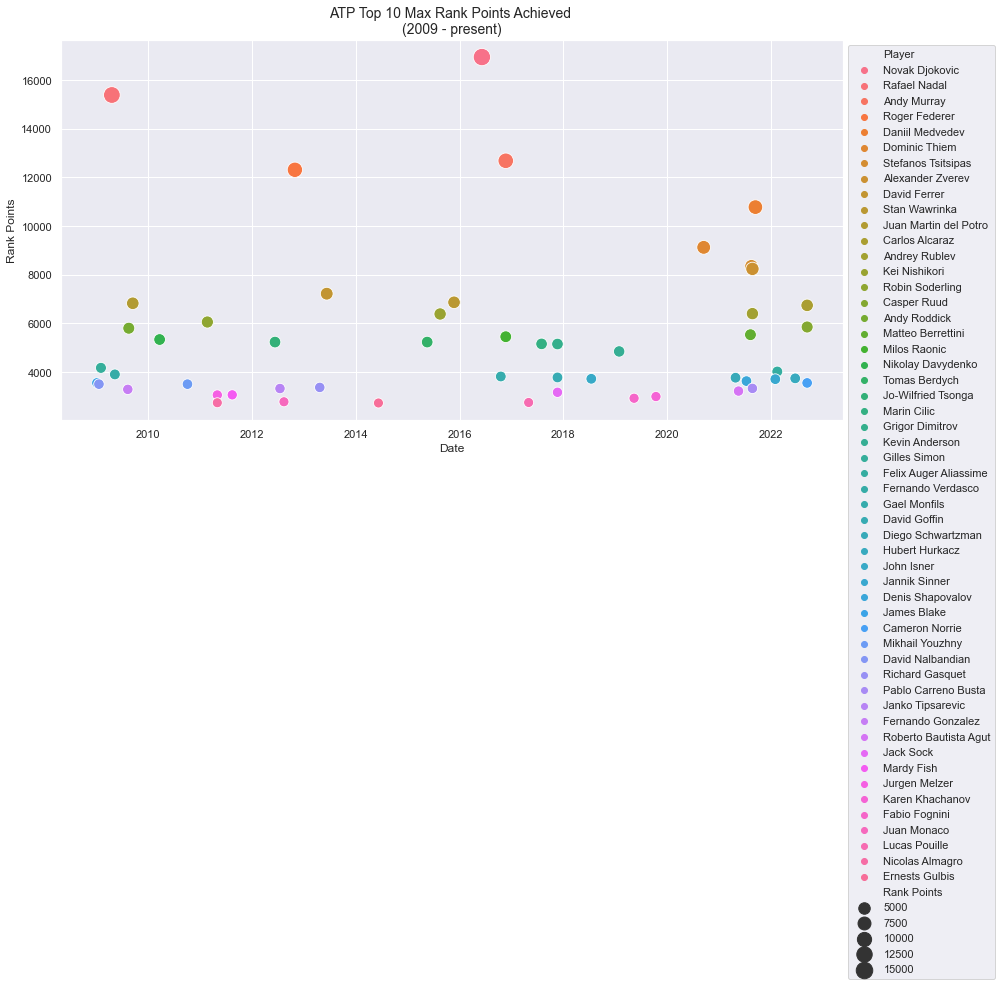

In [7]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(14, 7))

chart = grp[grp['rank'] <= 10]
sns.scatterplot(
    x = chart['ranking_date'].rename('Date'), 
    y = chart['points'].rename('Rank Points'), 
    hue=chart['full_name'].rename('Player'), 
    ax=ax, 
    sizes = (100, 300), 
    size=chart['points'].rename('Rank Points')
)
ax.set_title('ATP Top 10 Max Rank Points Achieved \n(2009 - present)', size=14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

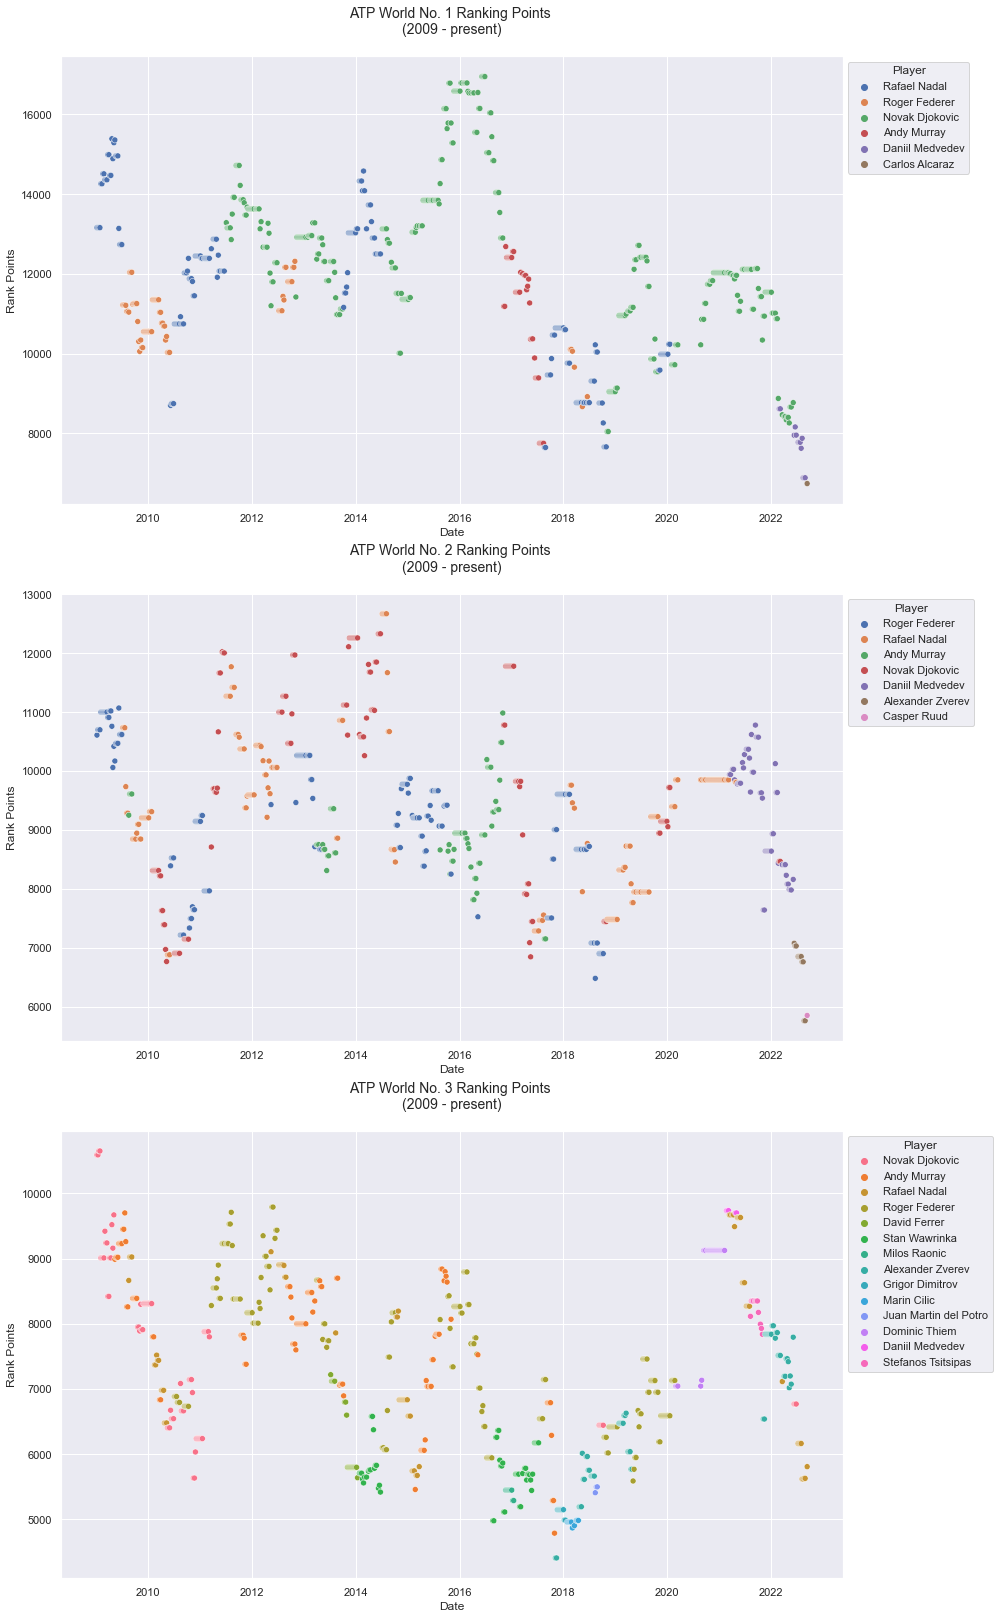

In [6]:

fig, ax = plt.subplots(nrows=3, figsize=(14, 28))

# Number 1
chart = df[df['rank'] == 1].sort_values('ranking_date').reset_index(drop=True)
sns.scatterplot(
    x = chart['ranking_date'].rename('Date'), 
    y = chart['points'].rename('Rank Points'), 
    hue=chart['full_name'].rename('Player'), 
    ax=ax[0], 
)
ax[0].set_title('ATP World No. 1 Ranking Points \n(2009 - present)\n', size=14)
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))

# Number 2
chart = df[df['rank'] == 2].sort_values('ranking_date').reset_index(drop=True)
sns.scatterplot(
    x = chart['ranking_date'].rename('Date'), 
    y = chart['points'].rename('Rank Points'), 
    hue=chart['full_name'].rename('Player'), 
    ax=ax[1], 
)
ax[1].set_title('ATP World No. 2 Ranking Points \n(2009 - present)\n', size=14)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))

# Number 3
chart = df[df['rank'] == 3].sort_values('ranking_date').reset_index(drop=True)
sns.scatterplot(
    x = chart['ranking_date'].rename('Date'), 
    y = chart['points'].rename('Rank Points'), 
    hue=chart['full_name'].rename('Player'), 
    ax=ax[2], 
)
ax[2].set_title('ATP World No. 3 Ranking Points \n(2009 - present)\n', size=14)
sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))


plt.show()